In [18]:
import pandas as pd
import seaborn as sns
from pandas_profiling import ProfileReport
import time
from datetime import datetime
import datetime
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [19]:
import pickle
# Function to serialise object
def save_pickle(file_nm, obj):
    pickle_out = open(file_nm, 'wb')
    pickle.dump(obj, pickle_out)
    pickle_out.close()

# Function to load object from pickle file
def load_pickle(file_nm):
    pickle_in = open(file_nm, 'rb')
    obj = pickle.load(pickle_in)
    return obj

In [20]:
src_df = pd.read_csv('incident_event_log.csv')

In [21]:
src_df.head()

number incident_state  active  reassignment_count  reopen_count  \
0  INC0000045            New    True                   0             0   
1  INC0000045       Resolved    True                   0             0   
2  INC0000045       Resolved    True                   0             0   
3  INC0000045         Closed   False                   0             0   
4  INC0000047            New    True                   0             0   

   sys_mod_count  made_sla    caller_id       opened_by        opened_at  ...  \
0              0      True  Caller 2403    Opened by  8  29/2/2016 01:16  ...   
1              2      True  Caller 2403    Opened by  8  29/2/2016 01:16  ...   
2              3      True  Caller 2403    Opened by  8  29/2/2016 01:16  ...   
3              4      True  Caller 2403    Opened by  8  29/2/2016 01:16  ...   
4              0      True  Caller 2403  Opened by  397  29/2/2016 04:40  ...   

  u_priority_confirmation         notify problem_id rfc vendor caused_by  \
0                   False  Do Not Notify          ?   ?      ?         ?   
1                   False  Do Not Notify          ?   ?      ?         ?   
2                   False  Do Not Notify          ?   ?      ?         ?   
3                   False  Do Not Notify          ?   ?      ?         ?   
4                   False  Do Not Notify          ?   ?      ?         ?   

  closed_code      resolved_by      resolved_at       closed_at  
0      code 5  Resolved by 149  29/2/2016 11:29  5/3/2016 12:00  
1      code 5  Resolved by 149  29/2/2016 11:29  5/3/2016 12:00  
2      code 5  Resolved by 149  29/2/2016 11:29  5/3/2016 12:00  
3      code 5  Resolved by 149  29/2/2016 11:29  5/3/2016 12:00  
4      code 5   Resolved by 81   1/3/2016 09:52  6/3/2016 10:00  

[5 rows x 36 columns]

In [22]:
# Convert all date fields to date time
datetime_vars_ls = ['opened_at', 'sys_created_at', 'sys_updated_at', 'resolved_at', 'closed_at']

for dt_var in datetime_vars_ls:
    src_df[dt_var] = [pd.to_datetime(dt, format='%d/%m/%Y %H:%M', errors='coerce') for dt in src_df[dt_var]]

In [23]:
src_df.head()

number incident_state  active  reassignment_count  reopen_count  \
0  INC0000045            New    True                   0             0   
1  INC0000045       Resolved    True                   0             0   
2  INC0000045       Resolved    True                   0             0   
3  INC0000045         Closed   False                   0             0   
4  INC0000047            New    True                   0             0   

   sys_mod_count  made_sla    caller_id       opened_by           opened_at  \
0              0      True  Caller 2403    Opened by  8 2016-02-29 01:16:00   
1              2      True  Caller 2403    Opened by  8 2016-02-29 01:16:00   
2              3      True  Caller 2403    Opened by  8 2016-02-29 01:16:00   
3              4      True  Caller 2403    Opened by  8 2016-02-29 01:16:00   
4              0      True  Caller 2403  Opened by  397 2016-02-29 04:40:00   

   ... u_priority_confirmation         notify problem_id rfc vendor caused_by  \
0  ...                   False  Do Not Notify          ?   ?      ?         ?   
1  ...                   False  Do Not Notify          ?   ?      ?         ?   
2  ...                   False  Do Not Notify          ?   ?      ?         ?   
3  ...                   False  Do Not Notify          ?   ?      ?         ?   
4  ...                   False  Do Not Notify          ?   ?      ?         ?   

  closed_code      resolved_by         resolved_at           closed_at  
0      code 5  Resolved by 149 2016-02-29 11:29:00 2016-03-05 12:00:00  
1      code 5  Resolved by 149 2016-02-29 11:29:00 2016-03-05 12:00:00  
2      code 5  Resolved by 149 2016-02-29 11:29:00 2016-03-05 12:00:00  
3      code 5  Resolved by 149 2016-02-29 11:29:00 2016-03-05 12:00:00  
4      code 5   Resolved by 81 2016-03-01 09:52:00 2016-03-06 10:00:00  

[5 rows x 36 columns]

### Initial data anlaysis - per incident state granularity

In [24]:
src_df.columns

Index(['number', 'incident_state', 'active', 'reassignment_count',
       'reopen_count', 'sys_mod_count', 'made_sla', 'caller_id', 'opened_by',
       'opened_at', 'sys_created_by', 'sys_created_at', 'sys_updated_by',
       'sys_updated_at', 'contact_type', 'location', 'category', 'subcategory',
       'u_symptom', 'cmdb_ci', 'impact', 'urgency', 'priority',
       'assignment_group', 'assigned_to', 'knowledge',
       'u_priority_confirmation', 'notify', 'problem_id', 'rfc', 'vendor',
       'caused_by', 'closed_code', 'resolved_by', 'resolved_at', 'closed_at'],
      dtype='object')

In [25]:
# Obtain the first chronological incident state of all incidents
# Sort the data frame by opend_at, followed by sys_created_at chronologically
src_by_date_df = src_df.sort_values(by=['opened_at', 'sys_created_at'])
# Extract the earliest incident state for each incident number
first_state_dct_ls = [{'number': number, 'first_state': src_by_date_df[src_by_date_df.number == number]['incident_state'].head(1)} for number in src_by_date_df.number.drop_duplicates()]
# Create extract into Data Frame
first_state_df = pd.DataFrame(first_state_dct_ls)
save_pickle('first_state_df.pickle', first_state_df)

In [26]:
first_state_df = load_pickle('first_state_df.pickle')
for i in range(0, first_state_df.shape[0]):
    first_state_df['first_state'].iloc[i] = first_state_df['first_state'].iloc[i].iloc[0]

In [27]:
first_state_summary_df = first_state_df.groupby('first_state').count()
first_state_summary_df

number
first_state               
Active                6503
Awaiting Problem         6
Awaiting User Info     193
New                  16397
Resolved              1819

Noted data quality issue: not all incidents start with "New" incident state.  This included where the first entry is already "Resolved".  We need to remove incidents which are not complete.

### Retaining only initial entries

In [28]:
# Filter for only the new ticket creation events to ensure we do not include unseen information when training
# Note: for each 'New' incident observations, it includes the outcome of the resolution (i.e. the prediction target) already
src_df = src_df[src_df.incident_state == 'New']
print('Population of incidents and incident_state: {}'.format(src_df[['number', 'incident_state']].drop_duplicates().shape[0]))

Population of incidents and incident_state: 16397


In [29]:
src_incident_observations_cnt_df = src_df.groupby('number').count()['incident_state']
src_incident_observations_cnt_df = src_incident_observations_cnt_df.reset_index(drop=False)
src_incident_observations_cnt_df.groupby('incident_state').count()

number
incident_state        
1                 7613
2                 4111
3                 2034
4                 1073
5                  658
6                  374
7                  205
8                  128
9                   74
10                  51
11                  25
12                  21
13                   8
14                   4
15                   6
16                   2
18                   3
19                   1
20                   2
21                   2
22                   1
23                   1

Noted data quality issue: all incidents are created multiple times (up to 23 times).  Therefore there is a need to extract only one "New" observation.

In [30]:
# Create a new data frame where incidents state as New and extract the most recent entry
# Sort chronologically (descending) to get the last incident creation entry
new_state_src_df = src_df.sort_values(by=['opened_at', 'sys_created_at'], ascending=False)
# Extract the last observation with the "New" incident state
last_state_dct_ls = [{'number': number, 'row': new_state_src_df[new_state_src_df.number == number].head(1)} for number in new_state_src_df.number.drop_duplicates()]

In [31]:
save_pickle('last_state_dct_ls.pickle', last_state_dct_ls)
last_state_dct_ls = load_pickle('last_state_dct_ls.pickle')

# Create a new data frame based on the most recent "New" incident state entries
new_state_src_df = pd.concat([dct.get('row') for dct in last_state_dct_ls], axis=0)
save_pickle('new_state_src_df.pickle', new_state_src_df)

In [32]:
new_state_src_df = load_pickle('new_state_src_df.pickle')
new_state_src_df.head()

number incident_state  active  reassignment_count  reopen_count  \
141698  INC0120495            New    True                   0             0   
141696  INC0120319            New    True                   0             0   
141691  INC0120303            New    True                   0             0   
141689  INC0120268            New    True                   0             0   
141687  INC0119987            New    True                   0             0   

        sys_mod_count  made_sla    caller_id       opened_by  \
141698              0      True   Caller 323   Opened by  14   
141696              0      True  Caller 1899  Opened by  508   
141691              0      True  Caller 1866  Opened by  508   
141689              0      True  Caller 1057  Opened by  508   
141687              0      True   Caller 831  Opened by  508   

                 opened_at  ... u_priority_confirmation         notify  \
141698 2017-02-15 11:58:00  ...                   False  Do Not Notify   
141696 2017-02-15 07:09:00  ...                   False  Do Not Notify   
141691 2017-02-15 01:52:00  ...                   False  Do Not Notify   
141689 2017-02-14 18:31:00  ...                   False  Do Not Notify   
141687 2017-02-14 11:15:00  ...                   False  Do Not Notify   

       problem_id rfc vendor caused_by closed_code resolved_by resolved_at  \
141698          ?   ?      ?         ?           ?           ?         NaT   
141696          ?   ?      ?         ?      code 6           ?         NaT   
141691          ?   ?      ?         ?      code 6           ?         NaT   
141689          ?   ?      ?         ?      code 6           ?         NaT   
141687          ?   ?      ?         ?      code 6           ?         NaT   

                 closed_at  
141698 2017-02-16 09:51:00  
141696 2017-02-15 07:09:00  
141691 2017-02-15 01:52:00  
141689 2017-02-14 18:31:00  
141687 2017-02-14 11:15:00  

[5 rows x 36 columns]

In [33]:
# Get list of variables except for the incident number
vars_ls = [variable for variable in list(new_state_src_df.columns) if variable != 'number']

# For each variable, count the number of possible levels and obtain modal
vars_levels_ls = []
population = new_state_src_df.shape[0]
for variable in vars_ls:
    vars_levels_count = len(new_state_src_df[variable].drop_duplicates())
    vars_modal_value = stats.mode(new_state_src_df[variable])[0]
    vars_modal_freq = stats.mode(new_state_src_df[variable])[1]
    vars_levels_ls += [{'variable': variable,
                        'levels_count': vars_levels_count,
                        'mode_value': vars_modal_value[0],
                        'values_modal_freq': vars_modal_freq[0],
                        'values_modal_pct': vars_modal_freq/population*100
                       }]

# Create a data frame from the dictionaries
vars_levels_df = pd.DataFrame(vars_levels_ls)
vars_levels_df['values_modal_pct'] = [pct[0] for pct in vars_levels_df.values_modal_pct]
vars_levels_df.to_excel('vars_levels_df.xlsx', index=False)
vars_levels_df

variable  levels_count                     mode_value  \
0            incident_state             1                            New   
1                    active             1                           True   
2        reassignment_count             1                              0   
3              reopen_count             1                              0   
4             sys_mod_count             4                              0   
5                  made_sla             1                           True   
6                 caller_id          4523                    Caller 4514   
7                 opened_by           182                  Opened by  17   
8                 opened_at         14114  2016-04-05T09:00:00.000000000   
9            sys_created_by           159                              ?   
10           sys_created_at          8905  2016-03-03T16:47:00.000000000   
11           sys_updated_by           159                 Updated by 908   
12           sys_updated_at         13910  2016-03-01T08:53:00.000000000   
13             contact_type             5                          Phone   
14                 location           196                   Location 204   
15                 category            56                    Category 53   
16              subcategory           238                Subcategory 174   
17                u_symptom           431                    Symptom 491   
18                  cmdb_ci            33                              ?   
19                   impact             3                     2 - Medium   
20                  urgency             3                     2 - Medium   
21                 priority             4                   3 - Moderate   
22         assignment_group            68                       Group 70   
23              assigned_to           162                              ?   
24                knowledge             2                          False   
25  u_priority_confirmation             1                          False   
26                   notify             2                  Do Not Notify   
27               problem_id           108                              ?   
28                      rfc            54                              ?   
29                   vendor             3                              ?   
30                caused_by             3                              ?   
31              closed_code            18                         code 6   
32              resolved_by           205                 Resolved by 11   
33              resolved_at         13798  2016-06-03T16:29:00.000000000   
34                closed_at          2247  2016-03-24T18:40:00.000000000   

    values_modal_freq  values_modal_pct  
0               16397        100.000000  
1               16397        100.000000  
2               16397        100.000000  
3               16397        100.000000  
4               16393         99.975605  
5               16397        100.000000  
6                 127          0.774532  
7                5103         31.121547  
8                   5          0.030493  
9                6450         39.336464  
10                  4          0.024395  
11               6449         39.330365  
12                  4          0.024395  
13              16205         98.829054  
14               3710         22.626090  
15               2014         12.282735  
16               4091         24.949686  
17               5935         36.195646  
18              16361         99.780448  
19              15796         96.334695  
20              15752         96.066354  
21              15613         95.218638  
22               7172         43.739708  
23               6766         41.263646  
24              13925         84.924071  
25              16397        100.000000  
26              16361         99.780448  
27              16239         99.036409  
28              16343         99.670671  
29              16384 

In [34]:
save_pickle('vars_levels_df.pickle', vars_levels_df)
vars_levels_df = load_pickle('vars_levels_df.pickle')

In [35]:
# Variables with the mode consisting of over 95% of the population
print('No. of variables with the mode cover over 95% population: {}'.format(vars_levels_df[vars_levels_df.values_modal_pct > 95].shape[0]))
vars_levels_df[vars_levels_df.values_modal_pct > 95]

No. of variables with the mode cover over 95% population: 17


variable  levels_count     mode_value  values_modal_freq  \
0            incident_state             1            New              16397   
1                    active             1           True              16397   
2        reassignment_count             1              0              16397   
3              reopen_count             1              0              16397   
4             sys_mod_count             4              0              16393   
5                  made_sla             1           True              16397   
13             contact_type             5          Phone              16205   
18                  cmdb_ci            33              ?              16361   
19                   impact             3     2 - Medium              15796   
20                  urgency             3     2 - Medium              15752   
21                 priority             4   3 - Moderate              15613   
25  u_priority_confirmation             1          False              16397   
26                   notify             2  Do Not Notify              16361   
27               problem_id           108              ?              16239   
28                      rfc            54              ?              16343   
29                   vendor             3              ?              16384   
30                caused_by             3              ?              16395   

    values_modal_pct  
0         100.000000  
1         100.000000  
2         100.000000  
3         100.000000  
4          99.975605  
5         100.000000  
13         98.829054  
18         99.780448  
19         96.334695  
20         96.066354  
21         95.218638  
25        100.000000  
26         99.780448  
27         99.036409  
28         99.670671  
29         99.920717  
30         99.987803

Above variables are noted where 17 variables with the mode making up over 95% of the population.  Because of their low variability, they are to be excluded from the data sets for the models.

### Removing variables with low level of variability

In [62]:
# Subsetting the data frames to those variables with the mode covering lower than 95%
new_state_src_subset_df = new_state_src_df
retain_vars_ls = ['number'] + list(vars_levels_df[vars_levels_df.values_modal_pct <= 95]['variable'])
new_state_src_subset_df = new_state_src_subset_df[retain_vars_ls]

### Removing dependent variables which are not the target

To ensure fair predictions by avoiding the outcome as part of the training data sets, we are to remove all the dependent variables that are not far the predictions (i.e. other than 'closed_code'.  In the processes of IT incidents and problems management, the outcome includes:
- resolved by
- resolved at
- closed at

In [63]:
redundant_y_ls = ['resolved_by', 'resolved_at', 'closed_at']
new_state_src_subset_df = new_state_src_subset_df[[col for col in new_state_src_subset_df.columns if col not in redundant_y_ls]]
save_pickle('new_state_src_subset_df.pickle', new_state_src_subset_df)
new_state_src_subset_df.head()

number    caller_id       opened_by           opened_at  \
141698  INC0120495   Caller 323   Opened by  14 2017-02-15 11:58:00   
141696  INC0120319  Caller 1899  Opened by  508 2017-02-15 07:09:00   
141691  INC0120303  Caller 1866  Opened by  508 2017-02-15 01:52:00   
141689  INC0120268  Caller 1057  Opened by  508 2017-02-14 18:31:00   
141687  INC0119987   Caller 831  Opened by  508 2017-02-14 11:15:00   

       sys_created_by sys_created_at  sys_updated_by      sys_updated_at  \
141698              ?            NaT  Updated by 908 2017-02-15 11:58:00   
141696              ?            NaT  Updated by 908 2017-02-15 07:09:00   
141691              ?            NaT  Updated by 908 2017-02-15 01:52:00   
141689              ?            NaT  Updated by 908 2017-02-14 18:31:00   
141687              ?            NaT  Updated by 908 2017-02-14 11:15:00   

            location     category      subcategory    u_symptom  \
141698  Location 135  Category 59  Subcategory 210  Symptom 483   
141696  Location 246  Category 50   Subcategory 10  Symptom 533   
141691  Location 246  Category 50   Subcategory 10  Symptom 533   
141689  Location 246  Category 50   Subcategory 10  Symptom 533   
141687  Location 246  Category 50   Subcategory 10  Symptom 533   

       assignment_group assigned_to  knowledge closed_code  
141698         Group 73           ?      False           ?  
141696         Group 70           ?      False      code 6  
141691         Group 70           ?      False      code 6  
141689         Group 70           ?      False      code 6  
141687         Group 70           ?      False      code 6

### Create new features

In [86]:
new_state_src_subset_df = load_pickle('new_state_src_subset_df.pickle')
new_state_src_subset_df.describe(include='all').T

count unique                  top   freq  \
number            16397  16397           INC0017762      1   
caller_id         16397   4523          Caller 4514    127   
opened_by         16397    182        Opened by  17   5103   
opened_at         16397  14114  2016-04-05 15:52:00      5   
sys_created_by    16397    159                    ?   6450   
sys_created_at     9947   8904  2016-03-03 16:47:00      4   
sys_updated_by    16397    159       Updated by 908   6449   
sys_updated_at    16397  13910  2016-03-03 16:23:00      4   
location          16397    196         Location 204   3710   
category          16397     56          Category 53   2014   
subcategory       16397    238      Subcategory 174   4091   
u_symptom         16397    431          Symptom 491   5935   
assignment_group  16397     68             Group 70   7172   
assigned_to       16397    162                    ?   6766   
knowledge         16397      2                False  13925   
closed_code       16397     18               code 6  10112   

                               first                last  
number                           NaT                 NaT  
caller_id                        NaT                 NaT  
opened_by                        NaT                 NaT  
opened_at        2016-02-29 01:16:00 2017-02-15 11:58:00  
sys_created_by                   NaT                 NaT  
sys_created_at   2016-02-29 01:23:00 2017-01-27 16:59:00  
sys_updated_by                   NaT                 NaT  
sys_updated_at   2016-02-29 01:23:00 2017-02-15 11:58:00  
location                         NaT                 NaT  
category                         NaT                 NaT  
subcategory                      NaT                 NaT  
u_symptom                        NaT                 NaT  
assignment_group                 NaT                 NaT  
assigned_to                      NaT                 NaT  
knowledge                        NaT                 NaT  
closed_code                      NaT                 NaT

In [87]:
# # Convert date time to UNIX epoch time
# # seconds since Jan 01 1970. (UTC)
# # datetime.timestamp()
# unix_dt = datetime.datetime(1970, 1, 1)
# nat = np.datetime64('NaT')

# # Filter observations with incomplete opening, resolved or closed dates
# dt_vars_ls = ['opened_at', 'resolved_at', 'closed_at']
# for variable in dt_vars_ls:
#     not_nan_df = [not np.isnan(dt.year)  for dt in new_state_src_subset_df[variable]]
#     new_state_src_subset_df = new_state_src_subset_df[not_nan_df]

# new_state_src_subset_df
    
# # Create new feature resolve_at duration
# new_state_src_subset_df['resolved_taken'] = new_state_src_subset_df.resolved_at - new_state_src_subset_df.opened_at

# # Create new feature closed_at duration
# new_state_src_subset_df['closed_taken'] = new_state_src_subset_df.closed_at - new_state_src_subset_df.opened_at

# # Convert to UNIX Epoch time stamp
# dt_vars_ls = ['opened_at', 'sys_created_at', 'sys_updated_at', 'resolved_at', 'closed_at']
# for variable in dt_vars_ls:
#     new_state_src_subset_df[variable] = [dt - unix_dt for dt in new_state_src_subset_df[variable]]
#     new_state_src_subset_df[variable] = [dt.seconds for dt in new_state_src_subset_df[variable]]

# # Convert duration features to seconds (and then to minutes) from datetime delta data type
# dt_vars_ls = ['resolved_taken', 'closed_taken']
# for variable in dt_vars_ls:
#     new_state_src_subset_df[variable] = [int(dt.seconds/60) for dt in new_state_src_subset_df[variable]]

    
# new_state_src_subset_timestamp_df = new_state_src_subset_df
# save_pickle('new_state_src_subset_timestamp_df.pickle', new_state_src_subset_timestamp_df)

Create new features based on the 'created_by' date into day of week and day of month.  There is no value in extracting the month from the date, given that all dates under 'created_by' is for February.

In [88]:
# Convert date time to UNIX epoch time
# seconds since Jan 01 1970. (UTC)
# datetime.timestamp()
unix_dt = datetime.datetime(1970, 1, 1)
nat = np.datetime64('NaT')

# Filter observations with incomplete opening closed dates
dt_vars_ls = ['opened_at']
for variable in dt_vars_ls:
    not_nan_df = [not np.isnan(dt.year)  for dt in new_state_src_subset_df[variable]]
    new_state_src_subset_df = new_state_src_subset_df[not_nan_df]

new_state_src_subset_df
    
# Create new feature opened_at - Day of Week
new_state_src_subset_df['opened_at_weekday'] = [dt.weekday() + 1 for dt in new_state_src_subset_df.opened_at]

# Create new feature opened_at - Day
new_state_src_subset_df['opened_at_day'] = [dt.day for dt in new_state_src_subset_df.opened_at]

# Drop the opened_at variable
new_state_src_subset_df.drop(columns='opened_at', inplace=True)

new_state_src_subset_timestamp_df = new_state_src_subset_df
save_pickle('new_state_src_subset_timestamp_df.pickle', new_state_src_subset_timestamp_df)

In [89]:
print(new_state_src_subset_timestamp_df.shape[0])
new_state_src_subset_timestamp_df

16397


number    caller_id       opened_by  sys_created_by  \
141698  INC0120495   Caller 323   Opened by  14               ?   
141696  INC0120319  Caller 1899  Opened by  508               ?   
141691  INC0120303  Caller 1866  Opened by  508               ?   
141689  INC0120268  Caller 1057  Opened by  508               ?   
141687  INC0119987   Caller 831  Opened by  508               ?   
...            ...          ...             ...             ...   
24      INC0000062  Caller 3765  Opened by  180   Created by 81   
20      INC0000060  Caller 4491  Opened by  180   Created by 81   
13      INC0000057  Caller 4416    Opened by  8               ?   
4       INC0000047  Caller 2403  Opened by  397  Created by 171   
0       INC0000045  Caller 2403    Opened by  8    Created by 6   

            sys_created_at  sys_updated_by      sys_updated_at      location  \
141698                 NaT  Updated by 908 2017-02-15 11:58:00  Location 135   
141696                 NaT  Updated by 908 2017-02-15 07:09:00  Location 246   
141691                 NaT  Updated by 908 2017-02-15 01:52:00  Location 246   
141689                 NaT  Updated by 908 2017-02-14 18:31:00  Location 246   
141687                 NaT  Updated by 908 2017-02-14 11:15:00  Location 246   
...                    ...             ...                 ...           ...   
24     2016-02-29 07:26:00  Updated by 340 2016-02-29 07:26:00   Location 93   
20     2016-02-29 06:42:00  Updated by 340 2016-02-29 06:42:00  Location 204   
13                     NaT   Updated by 21 2016-02-29 06:26:00  Location 204   
4      2016-02-29 04:57:00  Updated by 746 2016-02-29 04:57:00  Location 165   
0      2016-02-29 01:23:00   Updated by 21 2016-02-29 01:23:00  Location 143   

           category      subcategory    u_symptom assignment_group  \
141698  Category 59  Subcategory 210  Symptom 483         Group 73   
141696  Category 50   Subcategory 10  Symptom 533         Group 70   
141691  Category 50   Subcategory 10  Symptom 533         Group 70   
141689  Category 50   Subcategory 10  Symptom 533         Group 70   
141687  Category 50   Subcategory 10  Symptom 533         Group 70   
...             ...              ...          ...              ...   
24      Category 53  Subcategory 168  Symptom 232         Group 70   
20       Category 9   Subcategory 97  Symptom 450         Group 25   
13      Category 20  Subcategory 125  Symptom 471         Group 70   
4       Category 40  Subcategory 215  Symptom 471         Group 70   
0       Category 55  Subcategory 170   Symptom 72         Group 56   

         assigned_to  knowledge closed_code  opened_at_weekday  opened_at_day  
141698             ?      False           ?                  3             15  
141696             ?      False      code 6                  3             15  
141691             ?      False      code 6                  3             15  
141689             ?      False      code 6                  2             14  
141687             ?      False      code 6                  2             14  
...              ...        ...         ...                ...            ...  
24                 ?       True      code 7                  1             29  
20      Resolver 125       True      code 3                  1             29  
13                 ?       True     code 10                  1             29  
4        Resolver 89       True      code 5                  1             29  
0                  ?       True      code 5                  1             29  

[16397 rows x 17 columns]

### Factorise categorical values

In [98]:
new_state_src_subset_timestamp_df = load_pickle('new_state_src_subset_timestamp_df.pickle')
new_state_src_subset_timestamp_df.columns

Index(['number', 'caller_id', 'opened_by', 'sys_created_by', 'sys_created_at',
       'sys_updated_by', 'sys_updated_at', 'location', 'category',
       'subcategory', 'u_symptom', 'assignment_group', 'assigned_to',
       'knowledge', 'closed_code', 'opened_at_weekday', 'opened_at_day'],
      dtype='object')

In [99]:
# Create factors for each category in a categorical variable
def create_factors(pd_series):
    pd_factor = pd.factorize(pd_series)
    dct = dict(zip(pd_factor[1], range(0, len(pd_factor[1]))))
    return dct

# Re-map categorical values from string to integer ordinal values
def to_factors(dct, pd_series):
    new_ls = [dct.get(x) for x in pd_series]
    return new_ls

# Variables to factorise
var_to_factors_ls = ['number', 'caller_id', 'opened_by', 'sys_created_by',
       'sys_updated_by', 'location',
       'category', 'subcategory', 'u_symptom', 'assignment_group',
       'assigned_to', 'knowledge', 'closed_code']
var_factors_dct_ls = []

new_state_src_subset_timestamp_factors_df = new_state_src_subset_timestamp_df

# For each variable to factorise
for variable in var_to_factors_ls:
    # Create for each variable a dictionary to map the original values to corresponding factor levels
    factors_dct = create_factors(new_state_src_subset_timestamp_df[variable])
    # Add dictioanry to the list of factors to map
    var_factors_dct_ls += [(variable, factors_dct)]
    # Factorse the original data frame and to a new one
    new_state_src_subset_timestamp_factors_df[variable] = to_factors(factors_dct, new_state_src_subset_timestamp_df[variable])
    
new_state_src_subset_timestamp_factors_df.head()

number  caller_id  opened_by  sys_created_by sys_created_at  \
141698       0          0          0               0            NaT   
141696       1          1          1               0            NaT   
141691       2          2          1               0            NaT   
141689       3          3          1               0            NaT   
141687       4          4          1               0            NaT   

        sys_updated_by      sys_updated_at  location  category  subcategory  \
141698               0 2017-02-15 11:58:00         0         0            0   
141696               0 2017-02-15 07:09:00         1         1            1   
141691               0 2017-02-15 01:52:00         1         1            1   
141689               0 2017-02-14 18:31:00         1         1            1   
141687               0 2017-02-14 11:15:00         1         1            1   

        u_symptom  assignment_group  assigned_to  knowledge  closed_code  \
141698          0                 0            0          0            0   
141696          1                 1            0          0            1   
141691          1                 1            0          0            1   
141689          1                 1            0          0            1   
141687          1                 1            0          0            1   

        opened_at_weekday  opened_at_day  
141698                  3             15  
141696                  3             15  
141691                  3             15  
141689                  2             14  
141687                  2             14

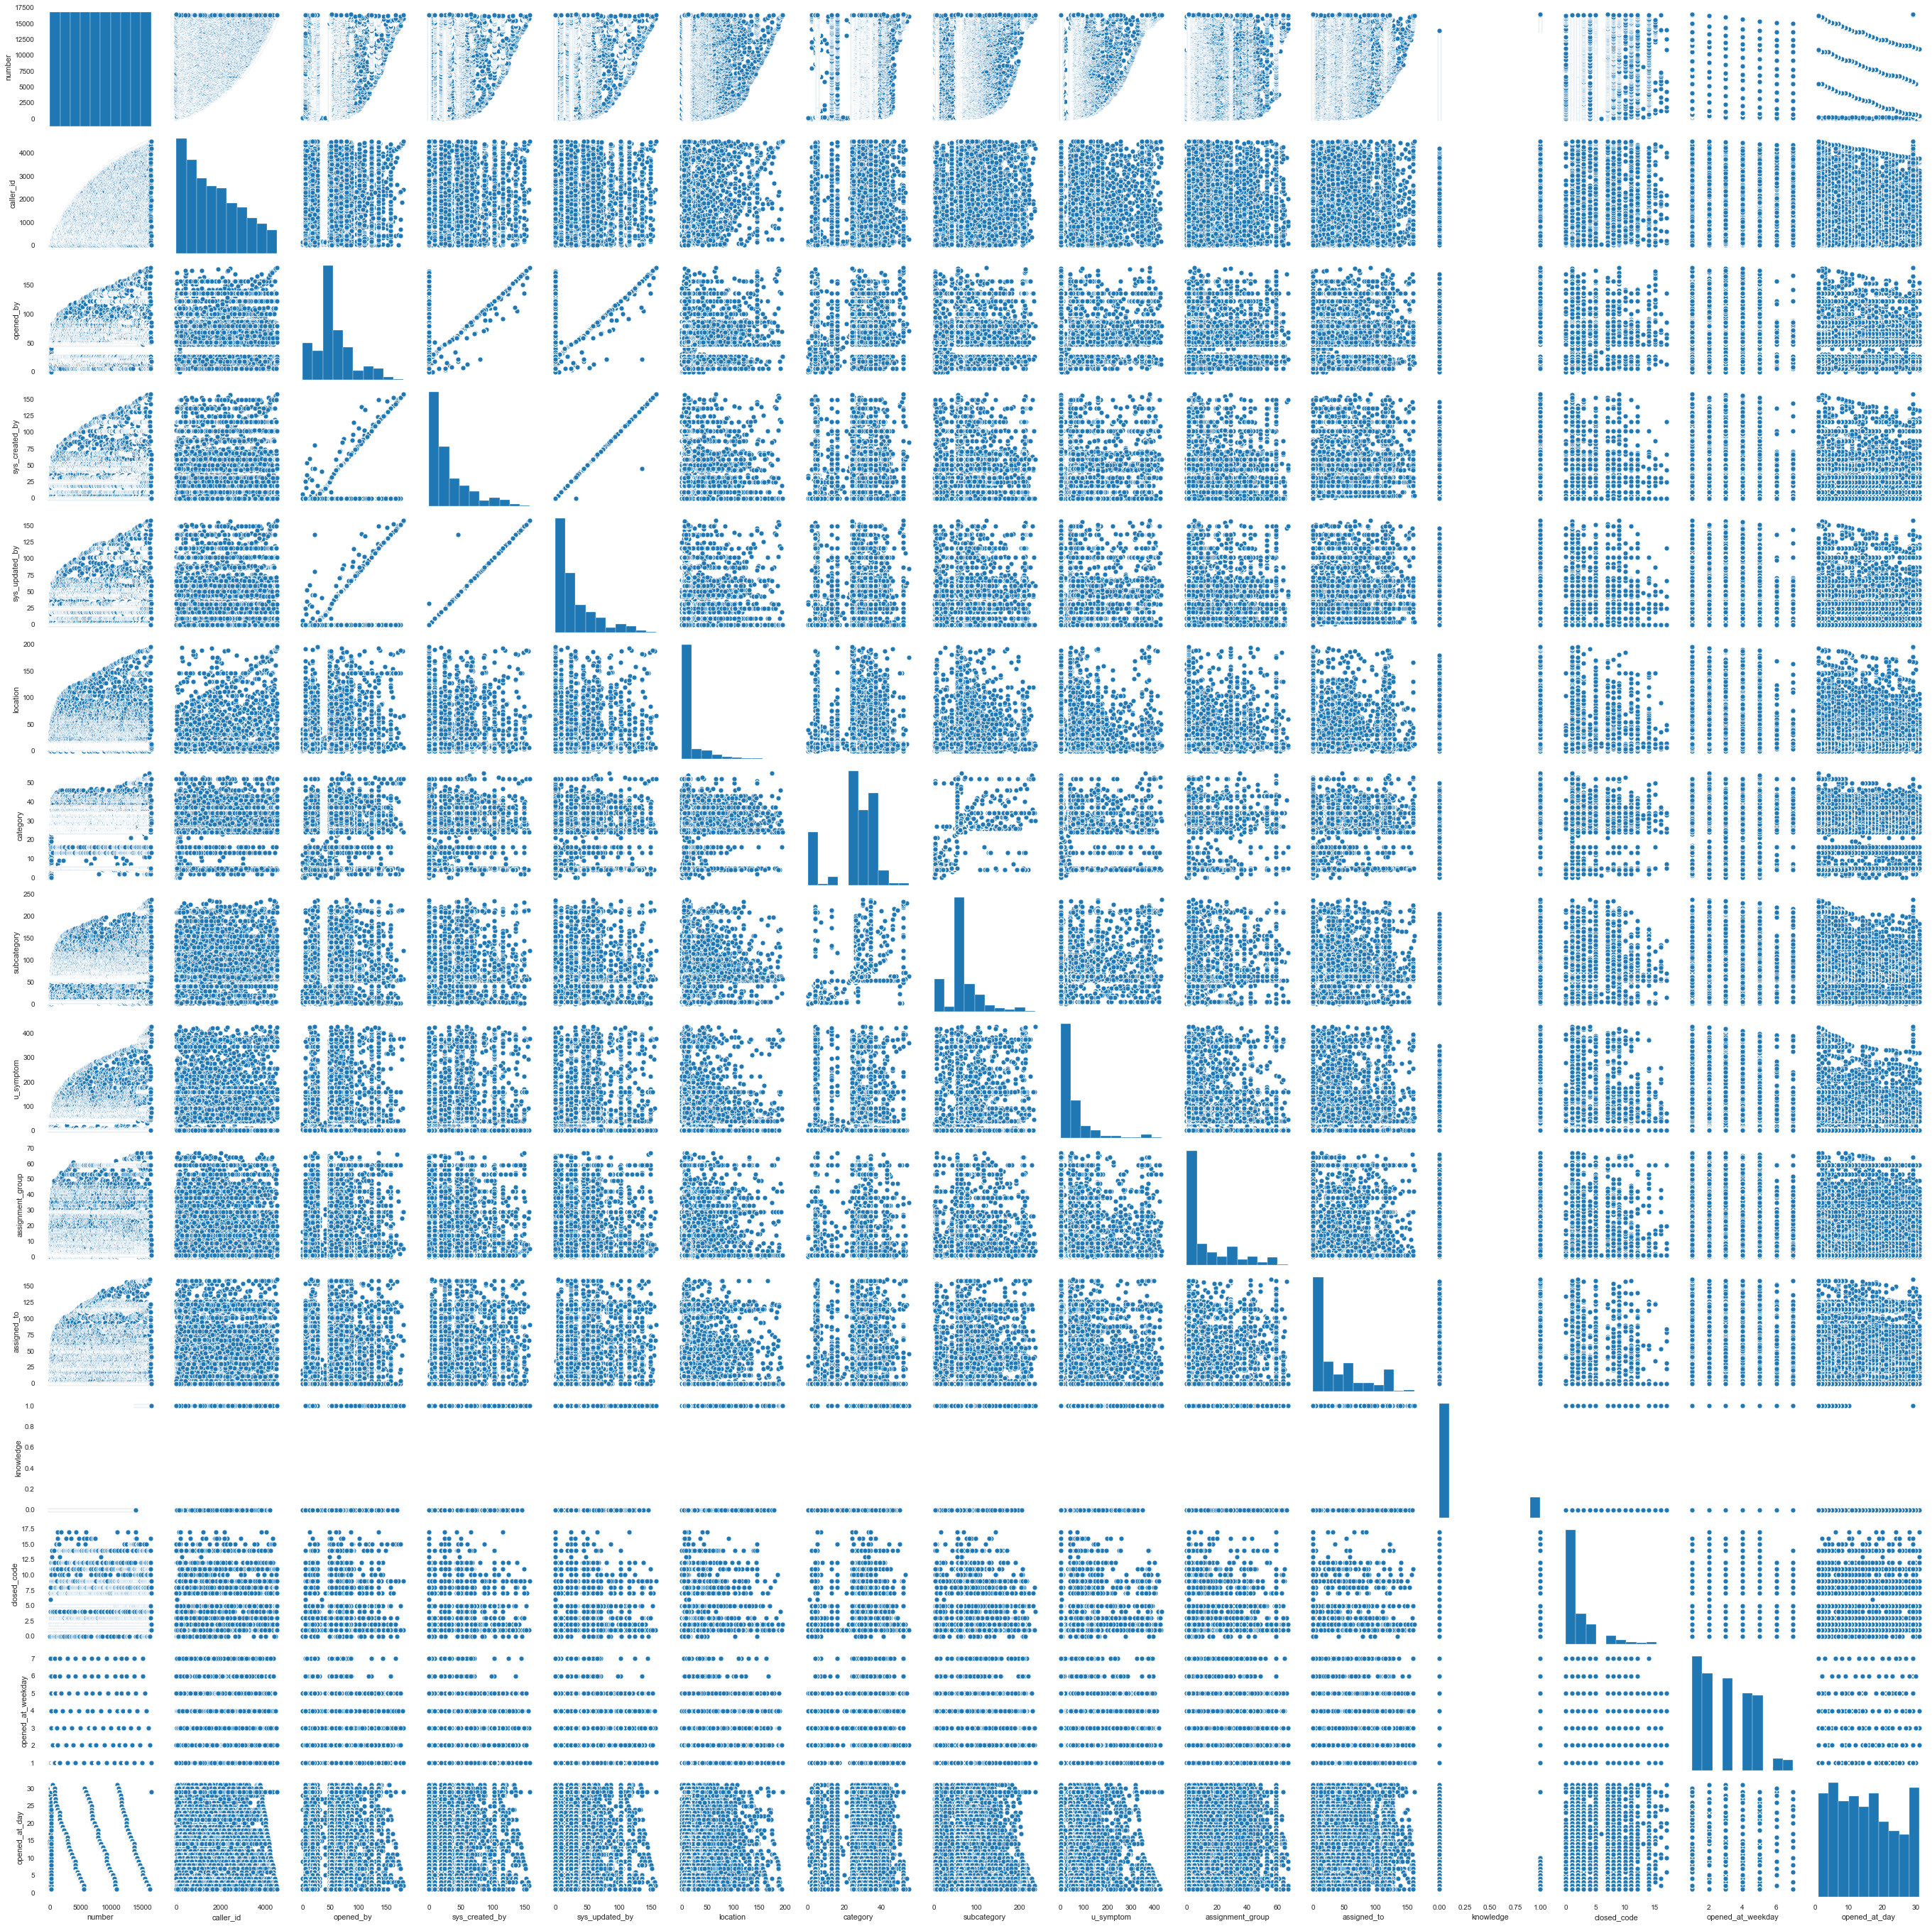

In [100]:
g = sns.pairplot(new_state_src_subset_timestamp_factors_df)
g.savefig("pairplot.png")

The pair plot visually shows a number of variables that highly correlate:
- opened_by and sys_created_by
- opened_by and sys_updated_by
- sys_created_by and sys_updated_by
- opened_at and sys_created_at
- opened_at and sys_updated_at
- sys_created_at and sys_updated_at

There is a correlation between 'opened_at_day' and 'number' but this is to be expected when a problem or incident is raised, a reference is created sequentially.  Given that the 'number' variable is not in scope as input, this would not have any impact to the learning.

As such, only the following dependent variables are to be retained:
- opened_by
- opened_at
- resolved_by
- closed_at
- closed_taken

In [102]:
# # Remove the unncessary variables to create a data frame for MATLAB
matlab_input_df = new_state_src_subset_timestamp_factors_df
print(matlab_input_df.columns)
matlab_input_df.drop(columns=['sys_created_by', 'sys_updated_by', 'sys_created_at', 'sys_updated_at', 'assigned_to'], 
                     inplace=True)

Index(['number', 'caller_id', 'opened_by', 'sys_created_by', 'sys_created_at',
       'sys_updated_by', 'sys_updated_at', 'location', 'category',
       'subcategory', 'u_symptom', 'assignment_group', 'assigned_to',
       'knowledge', 'closed_code', 'opened_at_weekday', 'opened_at_day'],
      dtype='object')


In [103]:
matlab_input_df.head()

number  caller_id  opened_by  location  category  subcategory  \
141698       0          0          0         0         0            0   
141696       1          1          1         1         1            1   
141691       2          2          1         1         1            1   
141689       3          3          1         1         1            1   
141687       4          4          1         1         1            1   

        u_symptom  assignment_group  knowledge  closed_code  \
141698          0                 0          0            0   
141696          1                 1          0            1   
141691          1                 1          0            1   
141689          1                 1          0            1   
141687          1                 1          0            1   

        opened_at_weekday  opened_at_day  
141698                  3             15  
141696                  3             15  
141691                  3             15  
141689                  2             14  
141687                  2             14

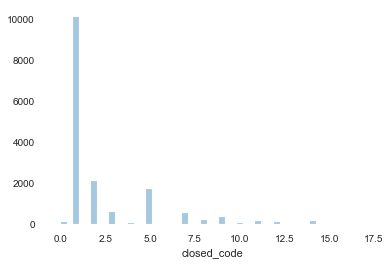

In [104]:
# Histogram for the target variable (closed_taken)
sns.distplot(matlab_input_df['closed_code'], kde=False);

The distribution plot of the target variable 'closed_taken' shows that it has a distribution that is not normal nor balanced.  The mode is near zero, whilst there is another peak (albeit much smaller in frequency) at over 30 hours.

In [105]:
# Save data frame to Excel file
matlab_input_df.to_excel('matlab_input_df.xlsx', index=False)

In [108]:
matlab_input_df.groupby('closed_code').count()['number']

closed_code
0        92
1     10112
2      2125
3       623
4        82
5      1700
6         2
7       567
8       222
9       338
10       46
11      178
12      110
13        3
14      137
15       36
16       16
17        8
Name: number, dtype: int64